<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Multivariate Analysis

### Initializations

In [27]:
# Bibliotheken einbinden
import math
import itertools
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [4]:
# Boxplot des Zusammenhangs von einem Attribut zu jeweils mehreren anderen auf bestimmte Zielgröße
def boxplot_multivariat(one, many, target):
    f, a = plt.subplots(len(many), 1, figsize=(16,6*len(many)))
    a = a.ravel()
    for idx, col in enumerate(many):
        sns.boxplot(x=one, y=col, hue=target, data=df, ax=a[idx])
        a[idx].set(ylabel=col)
        a[idx].set_xlabel(one, weight='bold')

In [5]:
# LMPlot des Zusammenhangs von jeder 2-er Kombination mehrerer Attribute auf bestimmte Zielgröße
def lmplot_combinations(attributes, target):
    c = list(itertools.combinations(attributes, 2))
    for idx, col in enumerate(c):
        sns.lmplot(x=col[0], y=col[1], hue=target, fit_reg=False, data=df)

### Boxplot for Turnover depending on Number of Projects vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


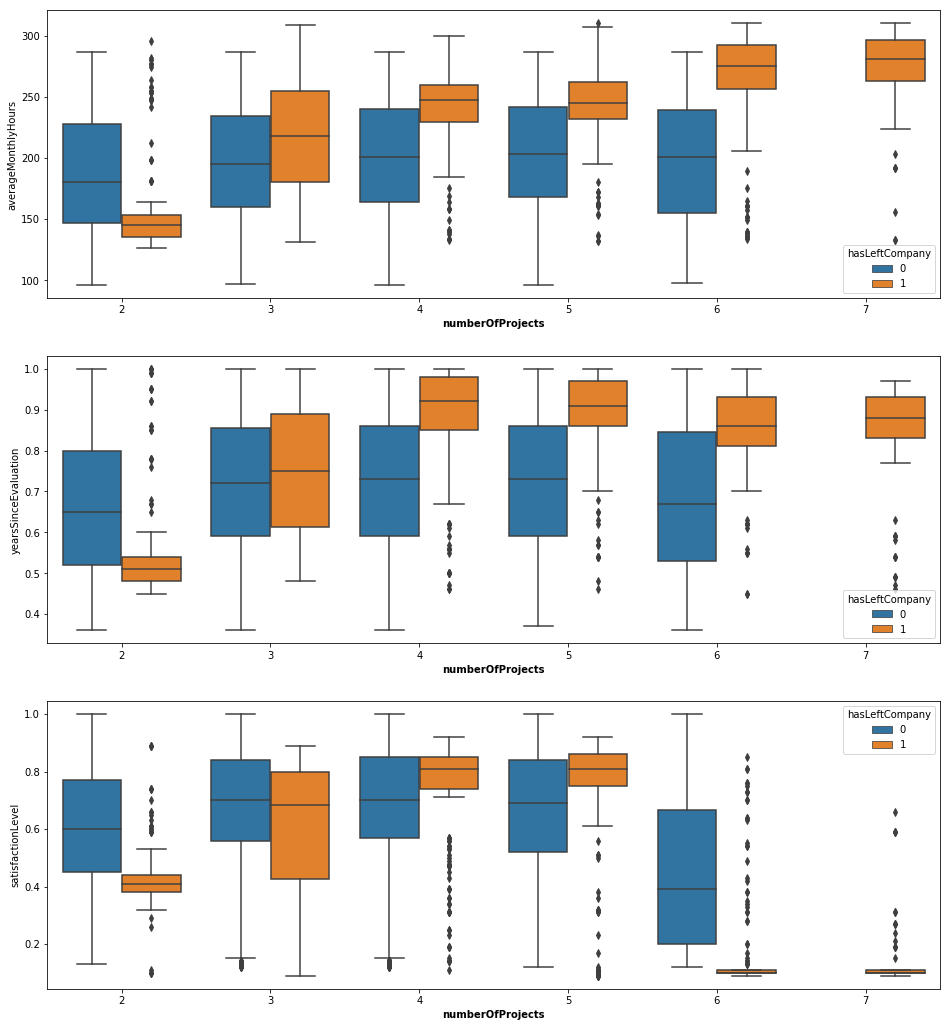

In [6]:
boxplot_multivariat('numberOfProjects', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### Boxplot for Turnover depending on Years at Company vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


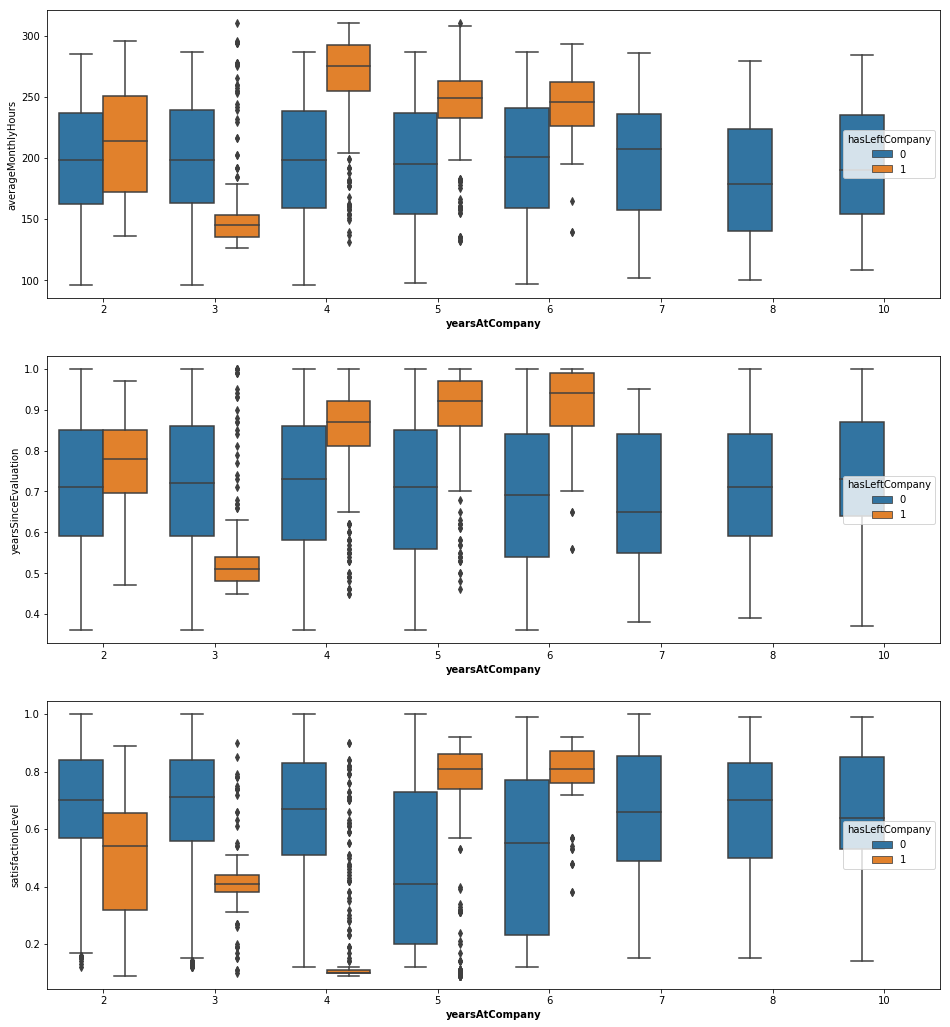

In [7]:
boxplot_multivariat('yearsAtCompany', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### Boxplot for Turnover depending on Department vs. Other Number Features

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


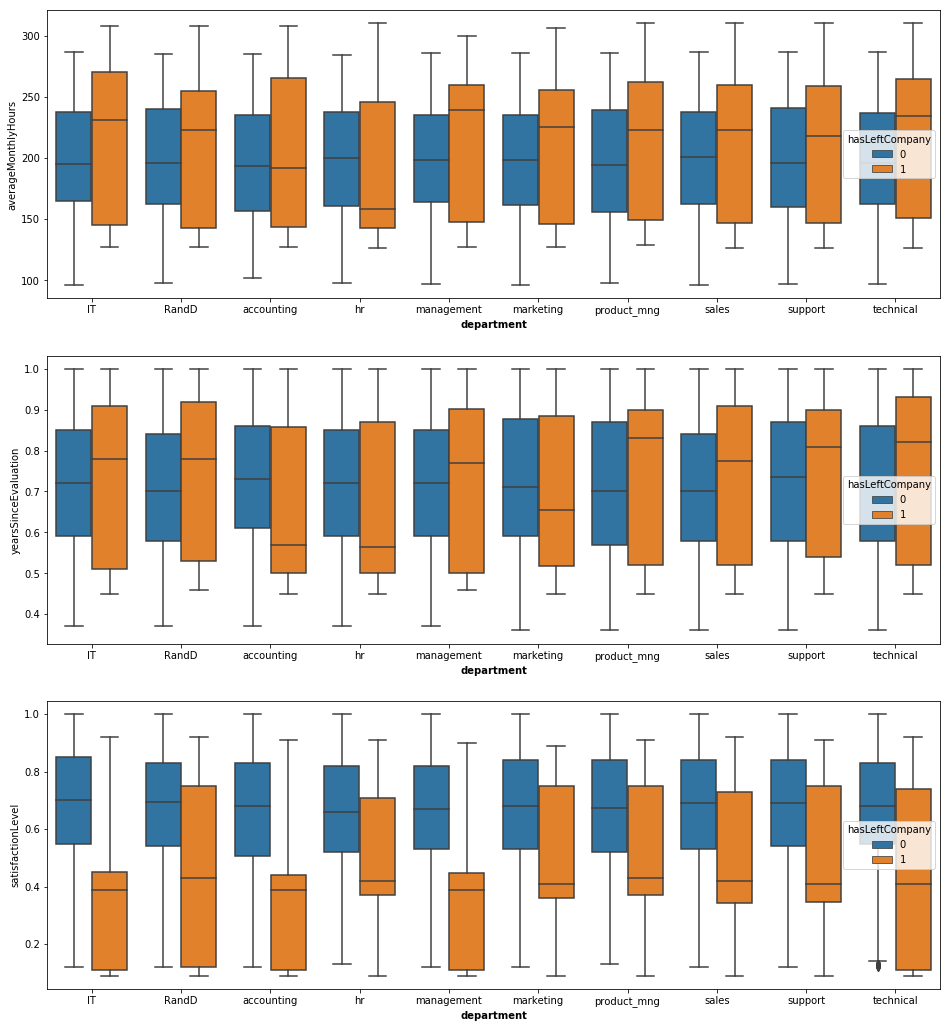

In [8]:
boxplot_multivariat('department', ['averageMonthlyHours', 'yearsSinceEvaluation', 'satisfactionLevel'], 'hasLeftCompany')

### LMPlot for Number Attributes with many distinct Values

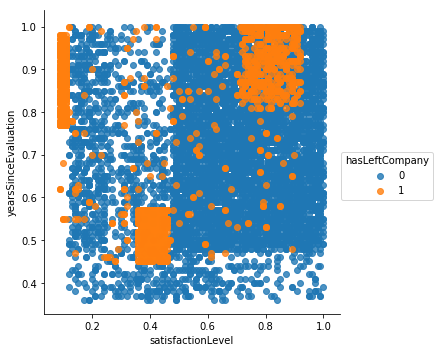

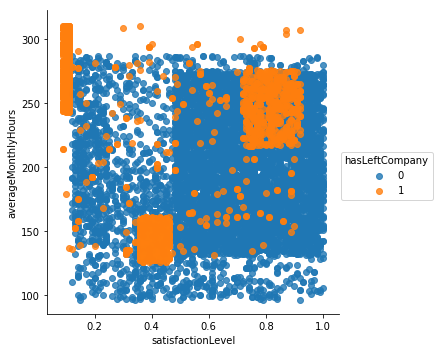

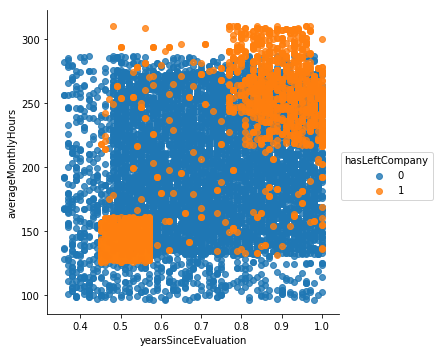

In [9]:
lmplot_combinations(['satisfactionLevel', 'yearsSinceEvaluation', 'averageMonthlyHours'], 'hasLeftCompany')

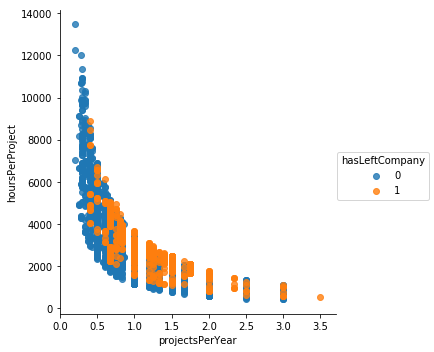

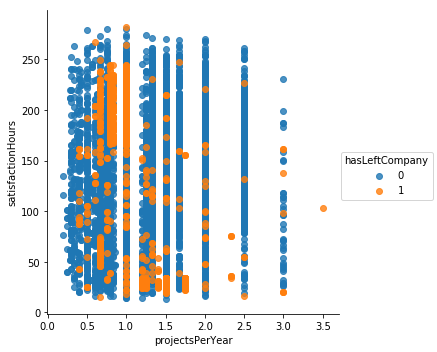

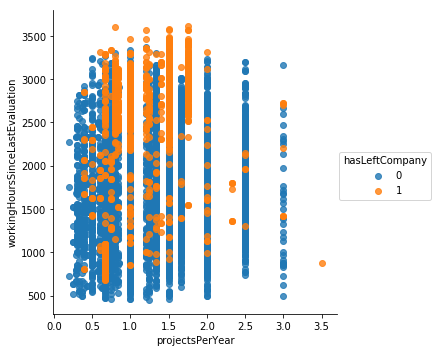

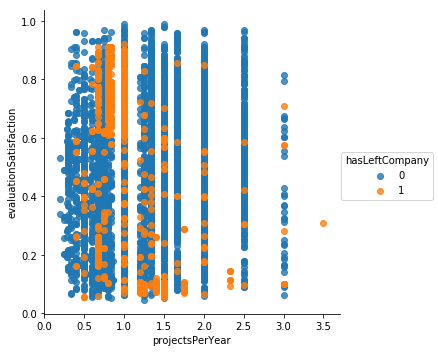

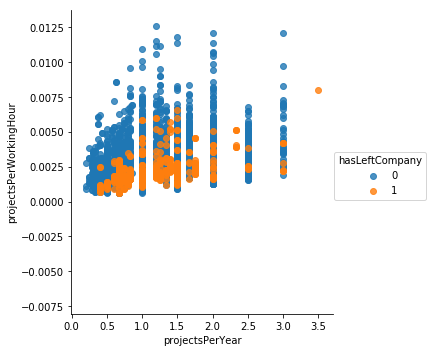

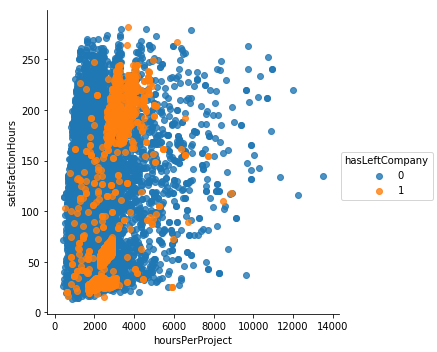

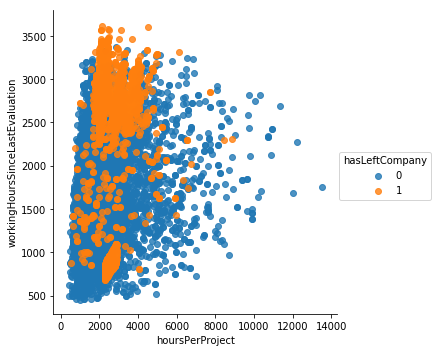

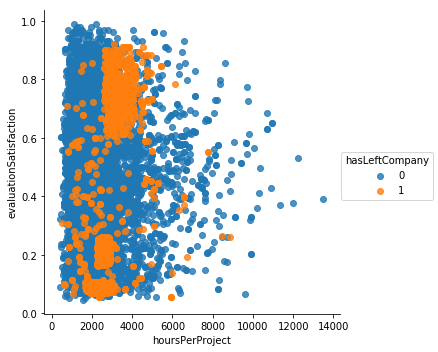

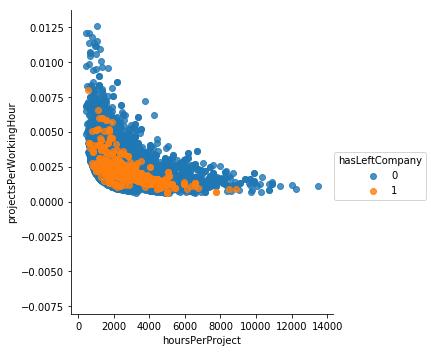

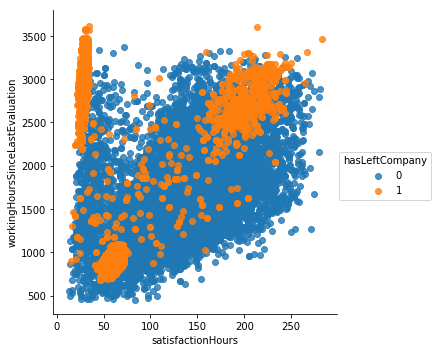

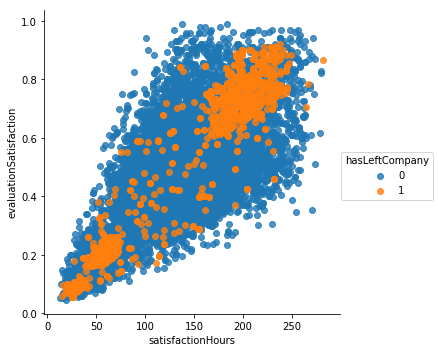

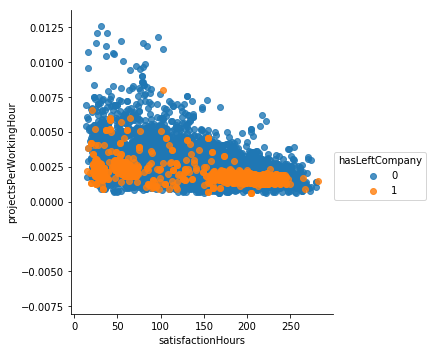

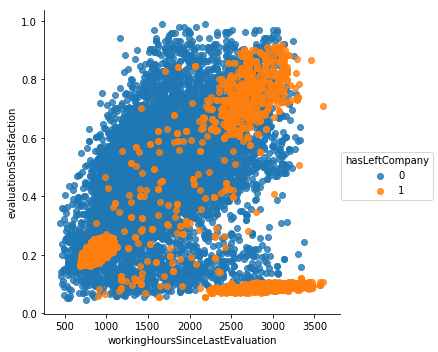

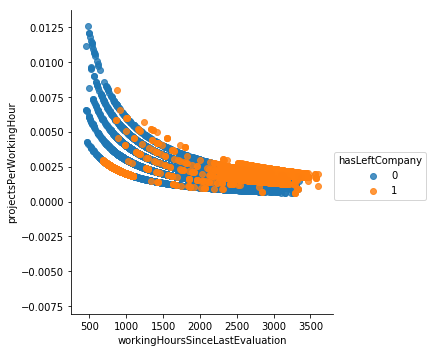

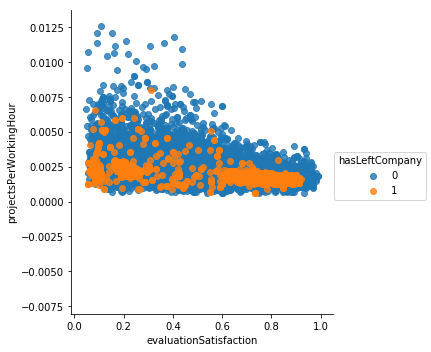

In [21]:
lmplot_combinations(['projectsPerYear', 'hoursPerProject', 'satisfactionHours', 'workingHoursSinceLastEvaluation', 'evaluationSatisfaction','projectsPerWorkingHour'], 'hasLeftCompany')



In [14]:
#Umwandlung der Datentypen in Integer
for col in ['workAccident', 'hasLeftCompany', 'gotPromotion']:
   df[col]=df[col].astype('int64')


,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,workAccident,hasLeftCompany,gotPromotion,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,projectsPerWorkingHour
satisfactionLevel,1.000000,0.108157,-0.142468,-0.009289,-0.098065,0.056196,-0.380088,0.028157,0.081487,-0.019769,0.873545,0.022394,0.877231,-0.104884
yearsSinceEvaluation,0.108157,1.000000,0.339897,0.335912,0.130818,-0.008613,0.007028,-0.010050,0.143325,0.027324,0.205297,0.797025,0.536141,-0.497354
numberOfProjects,-0.142468,0.339897,1.000000,0.417742,0.191711,-0.003372,0.022109,-0.006975,0.556750,-0.293279,-0.008674,0.459315,-0.015534,0.345452
averageMonthlyHours,-0.009289,0.335912,0.417742,1.000000,0.122529,-0.016674,0.075262,-0.006599,0.181664,0.297513,0.429526,0.819999,0.102678,-0.474482
yearsAtCompany,-0.098065,0.130818,0.191711,0.122529,1.000000,-0.012271,0.150889,0.059403,-0.582796,0.723302,-0.035280,0.163756,-0.022604,0.026272
workAccident,0.056196,-0.008613,-0.003372,-0.016674,-0.012271,1.000000,-0.157683,0.032564,0.037560,-0.021057,0.041520,-0.025048,0.036185,0.029679
hasLeftCompany,-0.380088,0.007028,0.022109,0.075262,0.150889,-0.157683,1.000000,-0.058816,-0.256411,0.159808,-0.291397,0.120524,-0.285270,-0.136885
gotPromotion,0.028157,-0.010050,-0.006975,-0.006599,0.059403,0.032564,-0.058816,1.000000,-0.023843,0.056766,0.022800,-0.009543,0.018899,0.007052
projectsPerYear,0.081487,0.143325,0.556750,0.181664,-0.582796,0.037560,-0.256411,-0.023843,1.000000,-0.711084,0.109470,0.175770,0.094840,0.248267
hoursPerProject,-0.019769,0.027324,-0.293279,0.297513,0.723302,-0.021057,0.159808,0.056766,-0.711084,1.000000,0.150949,0.209172,0.007555,-0.406280


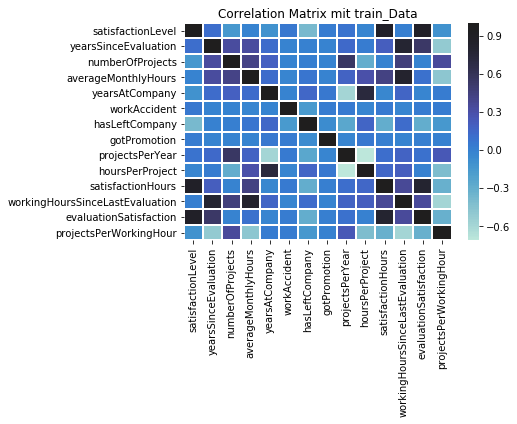

In [15]:
#Correlation Matrix mit train_Data
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
            linewidths=1, center =True).set_title('Correlation Matrix mit train_Data');
corr

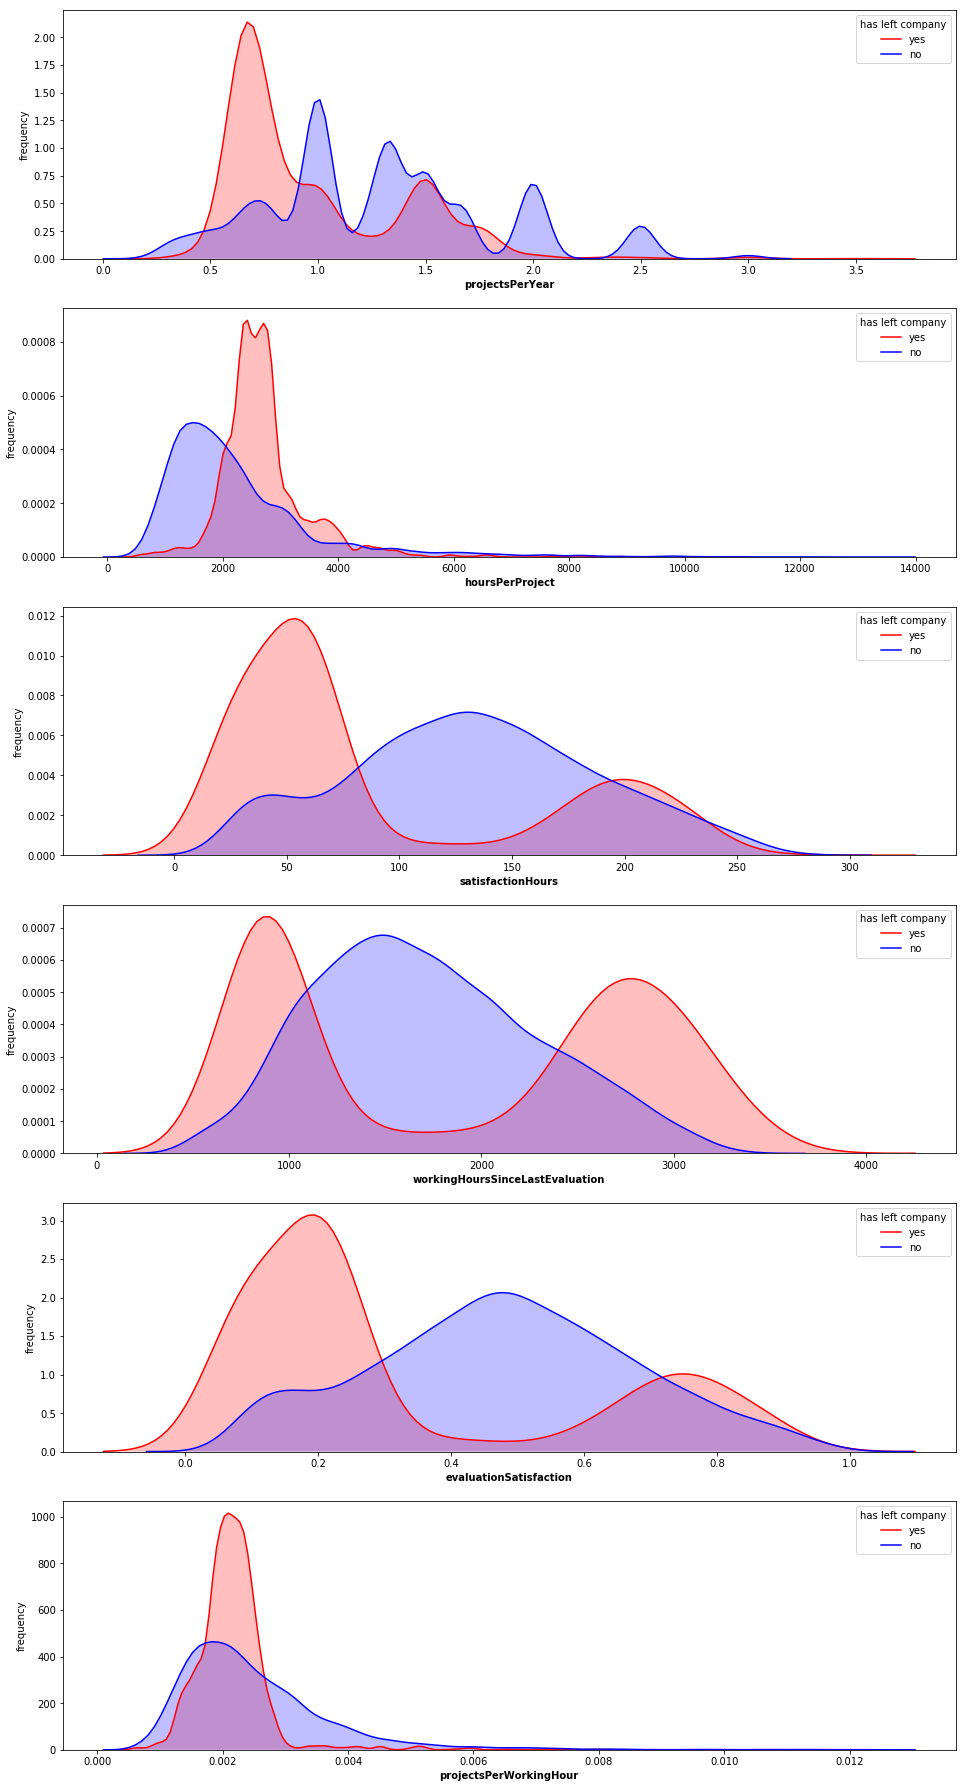

In [24]:
# Visualisierung des Zusammenhangs von satisfaction, evaluation, monthlyHours gegenüber dem Verlassen der Firma
f, a = plt.subplots(6, 1, figsize=(16,32))
a = a.ravel()
for idx, col in enumerate(['projectsPerYear', 'hoursPerProject', 'satisfactionHours', 'workingHoursSinceLastEvaluation', 'evaluationSatisfaction','projectsPerWorkingHour']):
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 1), col], color='r', shade=True, label='has left company', ax=a[idx])
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 0), col], color='b', shade=True, label='has not left company', ax=a[idx])
    a[idx].set(ylabel='frequency')
    a[idx].set_xlabel(col, weight='bold')
    a[idx].legend(title='has left company', labels=['yes', 'no'])

In [53]:
corrHasLeft = pd.DataFrame(corr['hasLeftCompany'].abs())
corrHasLeft.drop('hasLeftCompany', inplace=True)
corrHasLeft.sort_values('hasLeftCompany', ascending=False)

,hasLeftCompany
satisfactionLevel,0.380088
satisfactionHours,0.291397
evaluationSatisfaction,0.285270
projectsPerYear,0.256411
hoursPerProject,0.159808
workAccident,0.157683
yearsAtCompany,0.150889
projectsPerWorkingHour,0.136885
workingHoursSinceLastEvaluation,0.120524
averageMonthlyHours,0.075262


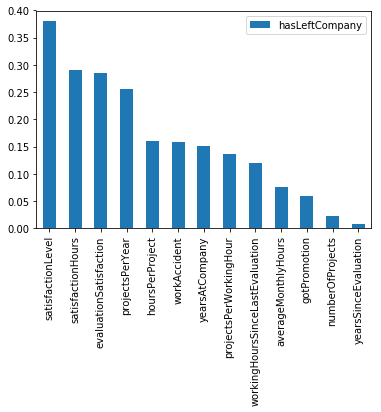

In [54]:
corrHasLeft.sort_values('hasLeftCompany', ascending=False).plot.bar()